In [1]:
import numpy as np
import matplotlib.pyplot as plt
from skimage import io
import os

In [2]:
# Data Loading
images = []
labels = []
files = os.listdir(r'processed_data')
for  pimg in files:
    image = io.imread(f'processed_data\\{pimg}').ravel()/255
    label = int(pimg.split('.')[0][-1])
    images.append(image)
    labels.append(label)

In [25]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(images, labels, test_size=0.25, random_state=1)

In [26]:
xtrain = np.array([image for image in X_train])
ytrain = np.array(y_train)
xtrain[0]

array([0.89411765, 0.89803922, 0.89803922, ..., 0.89019608, 0.89019608,
       0.89019608])

In [27]:
xtest = np.array([image for image in X_test])
y_test = np.array(y_test)

In [28]:
228*228//2//2//2//2

3249

# Modeling

In [29]:
from sklearn.neural_network import MLPClassifier

nn = MLPClassifier(hidden_layer_sizes=(784, 228), activation='logistic', verbose=2)
nn.fit(xtrain, ytrain.ravel())

Iteration 1, loss = 1.24068581
Iteration 2, loss = 1.42800110
Iteration 3, loss = 1.35102224
Iteration 4, loss = 1.21187164
Iteration 5, loss = 1.10461368
Iteration 6, loss = 1.12965479
Iteration 7, loss = 1.21355668
Iteration 8, loss = 1.21042412
Iteration 9, loss = 1.15064608
Iteration 10, loss = 1.10487830
Iteration 11, loss = 1.10118328
Iteration 12, loss = 1.12233951
Iteration 13, loss = 1.14352576
Iteration 14, loss = 1.15152544
Iteration 15, loss = 1.14340191
Iteration 16, loss = 1.12456566
Iteration 17, loss = 1.10576672
Iteration 18, loss = 1.09716025
Iteration 19, loss = 1.10188549
Iteration 20, loss = 1.11357729
Iteration 21, loss = 1.12144676
Iteration 22, loss = 1.11938189
Iteration 23, loss = 1.11001679
Iteration 24, loss = 1.10074267
Iteration 25, loss = 1.09713271
Iteration 26, loss = 1.09952078
Iteration 27, loss = 1.10452264
Iteration 28, loss = 1.10814273
Iteration 29, loss = 1.10826609
Training loss did not improve more than tol=0.000100 for 10 consecutive epochs. S

MLPClassifier(activation='logistic', hidden_layer_sizes=(784, 228), verbose=2)

In [30]:
ypred = nn.predict(xtest)
y_test == ypred

array([False,  True, False, False, False,  True,  True, False,  True,
       False, False, False,  True, False, False, False, False, False,
       False, False, False,  True,  True, False, False, False, False,
       False, False, False])

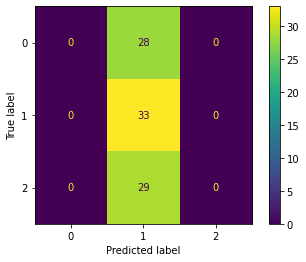

In [31]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(nn, xtrain, ytrain)